# Explore various functional network associations (didn't work)

In [19]:
%cd work/notebooks

# Import modules and R
import numpy as np, pandas as pd
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

# Import local code
import sys
sys.path.append('/home/jovyan/work/code')
from gradientVersion import *
from processing_helpers import *
from analysis_helpers import *
from mri_maps import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");

[Errno 2] No such file or directory: 'work/notebooks'
/home/jovyan/work/notebooks
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
dme_3d_ds5 = gradientVersion().fit('hcp_3donors_ds5')
scores = dme_3d_ds5.clean_scores()
nulls = np.load("../outputs/permutations/hcp_3d_ds5_spin_5000_v2.npy")

New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5


In [10]:
FC = pd.read_csv("../data/networks/paquola_FCmatrix.csv", header=None).values

In [17]:
FC_matched = FC[scores.index-1,:][:,scores.index-1]

In [47]:
seed_maps = pd.DataFrame(np_pearson_corr(FC_matched, scores.iloc[:,:3].values), 
                         index=scores.index, columns=scores.iloc[:,:3].columns).join(get_labels_hcp()).set_index('label')

In [52]:
seed_maps.join(get_maps()).corr()

,G1,G2,G3,T1T2,thickness,glasser_CMRO2,glasser_CMRGlu,G1_fMRI,PC1_neurosynth,externopyramidisation,glasser_GI,hill.evo_remapped,hill.dev_remapped,glasser_CBF,allom
G1,1.000000,-0.567936,0.630171,0.608931,-0.462911,0.279282,-0.023416,-0.882067,-0.416030,0.365045,-0.429449,-0.345228,-0.409434,-0.035911,-0.191502
G2,-0.567936,1.000000,-0.534224,-0.380344,0.226294,0.018971,0.345197,0.499410,-0.131046,-0.529629,0.634019,0.659708,0.514170,0.284991,0.197607
G3,0.630171,-0.534224,1.000000,0.403554,-0.229049,0.063219,-0.238532,-0.838432,-0.510722,0.116358,-0.543239,-0.314604,-0.378129,-0.027595,-0.208240
T1T2,0.608931,-0.380344,0.403554,1.000000,-0.540181,0.507485,0.302762,-0.481666,-0.155989,0.235112,-0.119985,-0.391224,-0.325015,0.250295,-0.231042
thickness,-0.462911,0.226294,-0.229049,-0.540181,1.000000,-0.425399,-0.361314,0.328438,0.177198,0.011420,-0.105050,0.288997,0.106417,-0.192454,0.066041
glasser_CMRO2,0.279282,0.018971,0.063219,0.507485,-0.425399,1.000000,0.864516,-0.122033,-0.143082,-0.042184,0.275940,-0.118324,0.003508,0.790571,0.254460
glasser_CMRGlu,-0.023416,0.345197,-0.238532,0.302762,-0.361314,0.864516,1.000000,0.179548,-0.052859,-0.290763,0.721646,0.083650,0.248154,0.802873,0.395700
G1_fMRI,-0.882067,0.499410,-0.838432,-0.481666,0.328438,-0.122033,0.179548,1.000000,0.624769,-0.262473,0.511446,0.228890,0.380537,0.110357,0.191801
PC1_neurosynth,-0.416030,-0.131046,-0.510722,-0.155989,0.177198,-0.143082,-0.052859,0.624769,1.000000,0.195179,0.095987,-0.246425,-0.032785,-0.109767,-0.060398
externopyramidisation,0.365045,-0.529629,0.116358,0.235112,0.011420,-0.042184,-0.290763,-0.262473,0.195179,1.000000,-0.497949,-0.281292,-0.258233,-0.356707,-0.181408


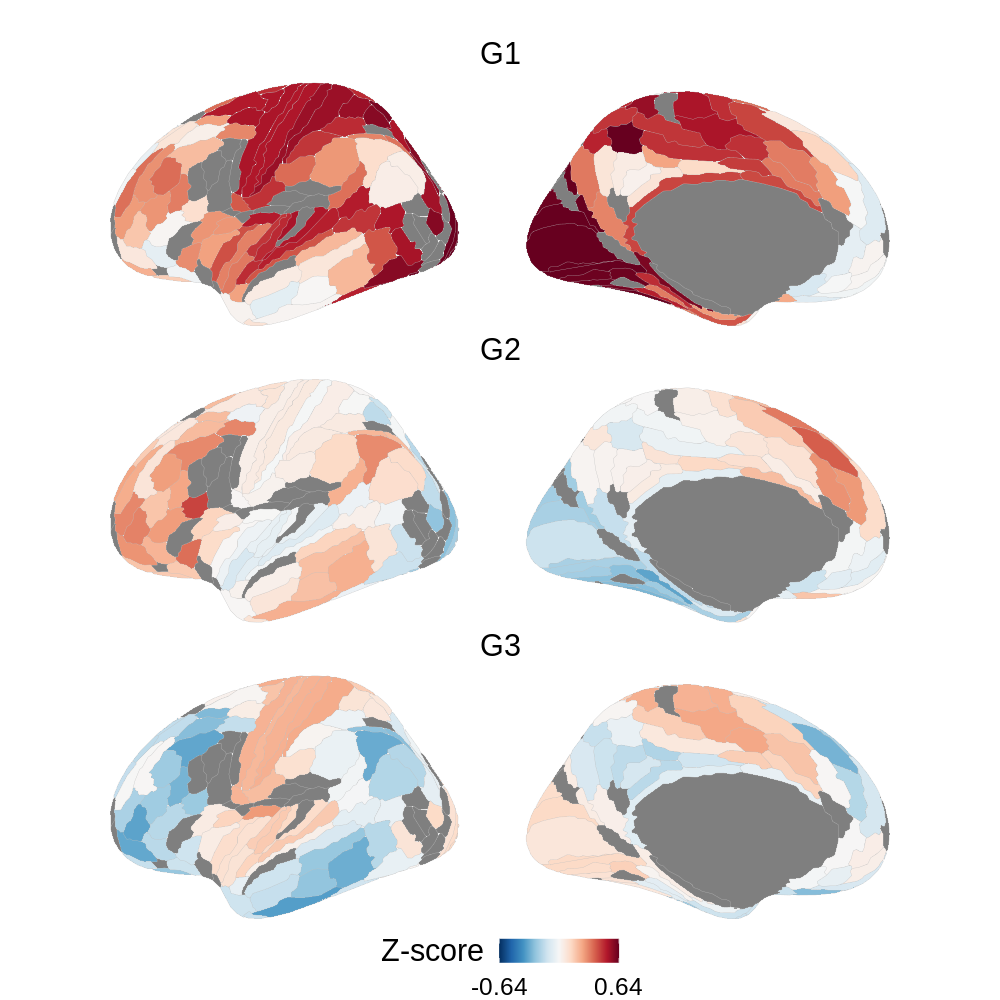

In [40]:
%%R -i seed_maps -w 10 -h 10 -u in -r 100
source("../code/plot_maps.R")
plot_maps(seed_maps, ncol=1)